# Homework 8: Applied Machine Learning

## TensorFlow Keras MLP

Josh Gregory

## Canvas assignment instructions

For HW 8, use the TensorFlow Keras MLP Dense Layers (Fully connected neural netwrok, see ICHW 12).  For full credit annotated each cell  in your .ipynb as shown in ICHW 12. Make sure you include the accuracy v. epochs and loss v. epochs graphs.

After you have completed HW 8 upload and submit your files.

For notebook assignments, you will always turn in your .ipynb notebook file and an HTML file of the notebook.

For HTML: Click File → Save and Export Notebook As → HTML to make a nice HTML of the notebook.

For .ipynb: Click File → Download

Turn in both the .ipynb and .html files in Canvas.

In [1]:
# imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

2024-11-18 01:07:20.227737: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 01:07:20.230342: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 01:07:20.285706: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 01:07:20.286811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 01:07:21.339885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Import the digits dataset

In [2]:
digits = pd.read_csv('digits_8K.csv')

digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into training and testing

Will use `train_test_split` from the sklearn library

In [3]:
X = digits.iloc[:, 1:785]
y = digits.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=42, stratify=y)

## Explore the data

Check a few of the digits to make sure they're coming out correctly:

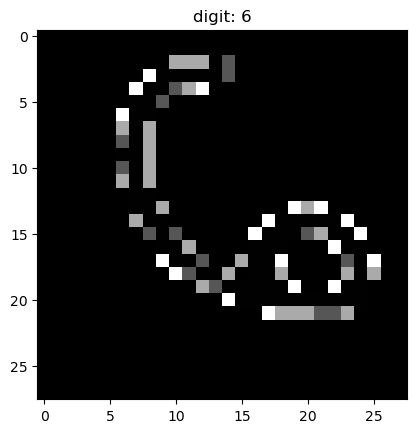

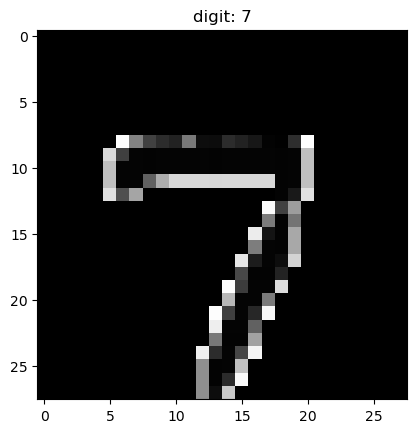

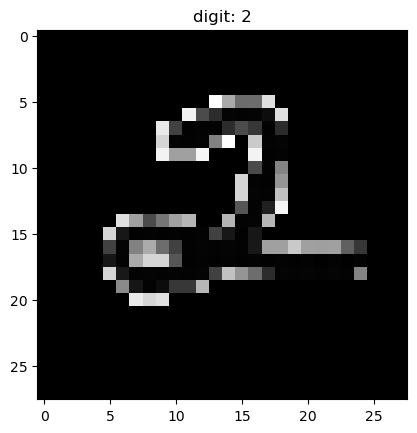

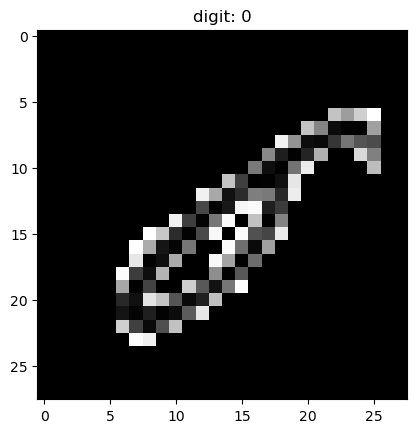

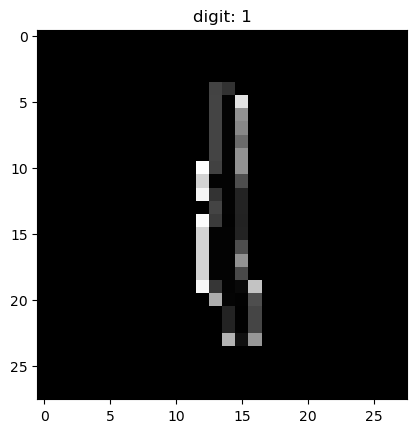

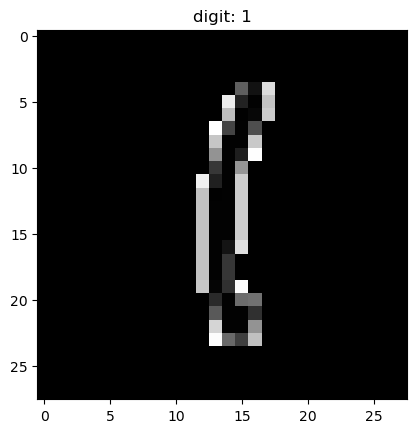

In [4]:
for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('digit: {0}'. format(y_test.values[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

## Check pixel intensity values

I'm pretty sure the pixels are all scaled correctly (0-255), but let's check to make sure:

In [5]:
max_val = X.max().max()

min_val = X.min().min()

print(f'Min val: {min_val}')
print(f'Max val: {max_val}')

Min val: 0
Max val: 255


## Reshape data

Reshaping data to be 28x28 for the input to be able to plot later:

In [6]:
X_train = X_train.values.reshape(-1, 28, 28)
X_test = X_test.values.reshape(-1, 28, 28)

## Build the model

The first step is to verify the input shape of the images. We're told and can see that the shape of the images are 28x28, both from previous assignments, but also from the fact that the last column of the dataset is labeled "28x28".

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile the model

Specifying the optimizer, loss function, and metrics to track. Here we'll use the following:

Optimizer: Adam

Loss function: SparseCategoricalCrossentropy

Metrics: Accuracy

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Feed the model the training images and labels

In [10]:
print(type(X_train))
training_history = model.fit(X_train, y_train, epochs=10, batch_size=256)

<class 'numpy.ndarray'>
Epoch 1/10
22/22 [==============================] - 1s 4ms/step - loss: 31.6706 - accuracy: 0.5812
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 6.4707 - accuracy: 0.8480
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 3.3867 - accuracy: 0.8933
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 2.0329 - accuracy: 0.9180
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 1.2662 - accuracy: 0.9378
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.8104 - accuracy: 0.9520
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9643
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9753
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9810
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0

In [11]:
print(training_history.history['loss'])

[31.670597076416016, 6.47072172164917, 3.3866770267486572, 2.032905340194702, 1.2661970853805542, 0.8104251027107239, 0.4816114902496338, 0.28359949588775635, 0.1546226292848587, 0.12816648185253143]


## Evaluate accuracy

See how the model performs on the test dataset:

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

76/76 - 0s - loss: 3.3457 - accuracy: 0.8893 - 224ms/epoch - 3ms/step

Test accuracy: 0.889257550239563


## Make predictions

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(X_test)

76/76 [==============================] - 0s 1ms/step


In [15]:
pred_index = 17

print(f'Predicted value: {np.argmax(predictions[pred_index])}')
print(f'Actual value: {np.argmax(predictions[pred_index])}')

Predicted value: 6
Actual value: 6


Can also look at the arrays of the model's confidence in each category (0-9):

In [16]:
predictions[pred_index]

array([6.8468448e-10, 0.0000000e+00, 0.0000000e+00, 1.6229601e-01,
       0.0000000e+00, 1.7735757e-22, 8.3770400e-01, 0.0000000e+00,
       1.6086290e-24, 5.5290838e-36], dtype=float32)

In [17]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Verify predictions

For some reason, ICHW 12 code didn't work to plot predictions, but will use other ways.

In [18]:
i = 0

img = X_test

print(y_test.iloc[i])

0


In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label.iloc[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label.iloc[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

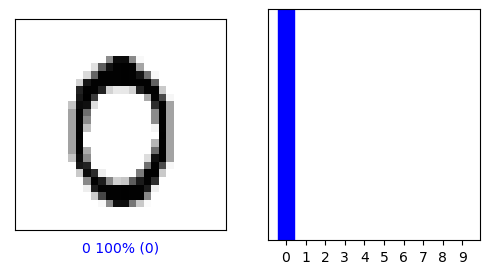

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

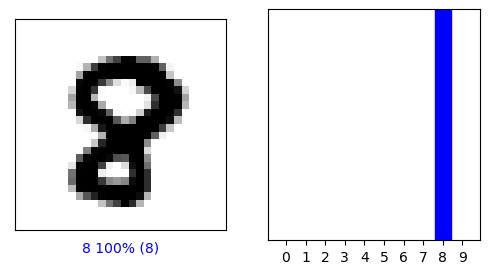

In [21]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

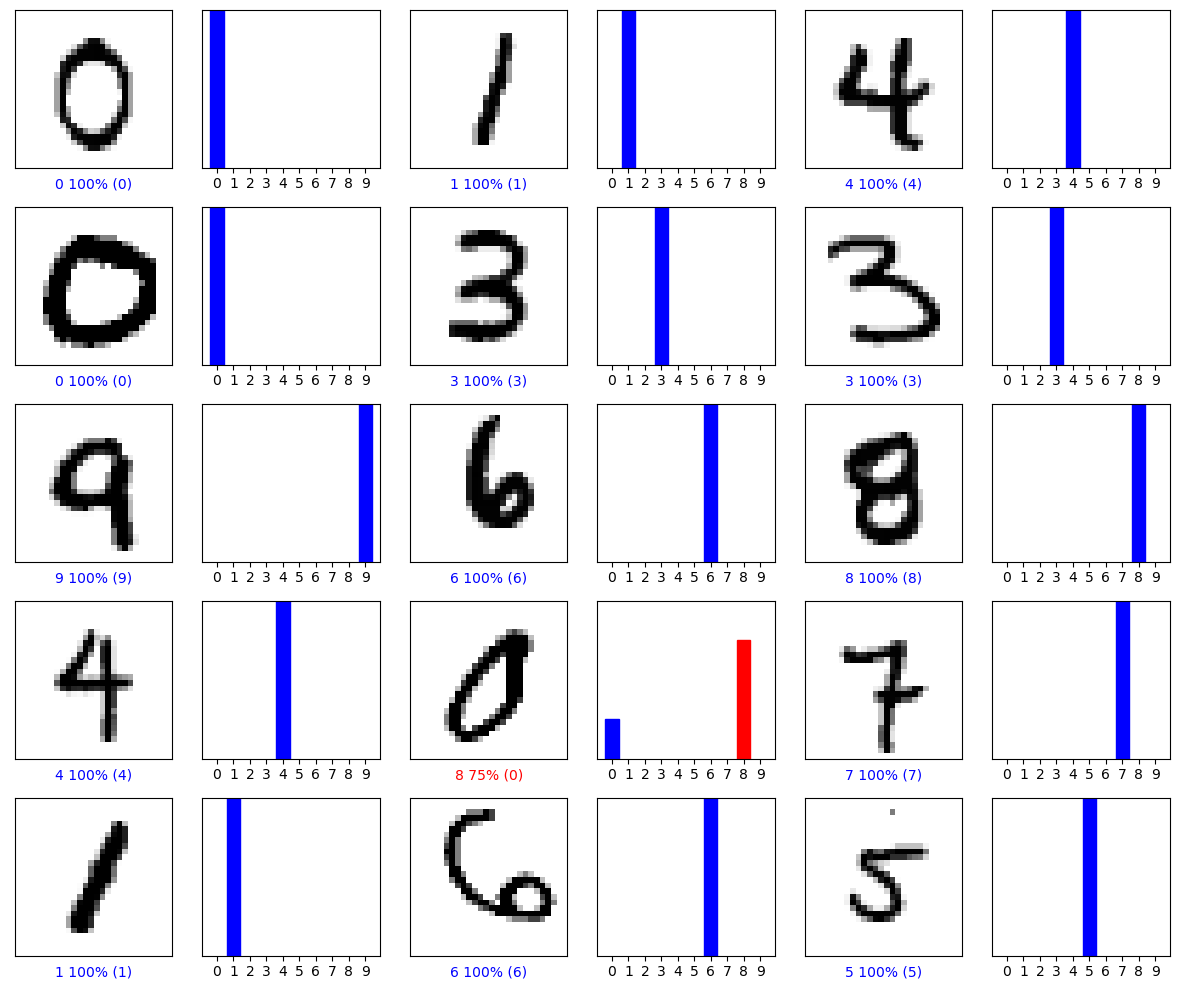

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## Use the trained model

Use the trained model to make a prediction about a single image:

In [23]:
# Grab an image from the test dataset.
img = X_test[5]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


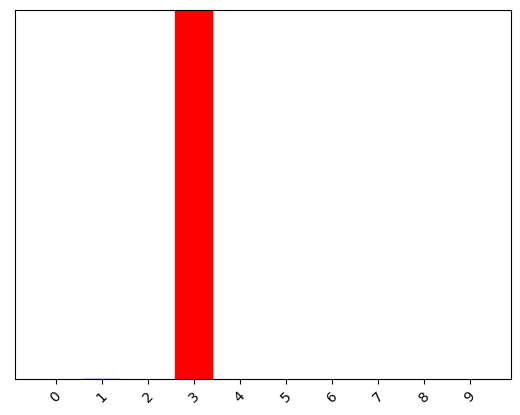

In [26]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

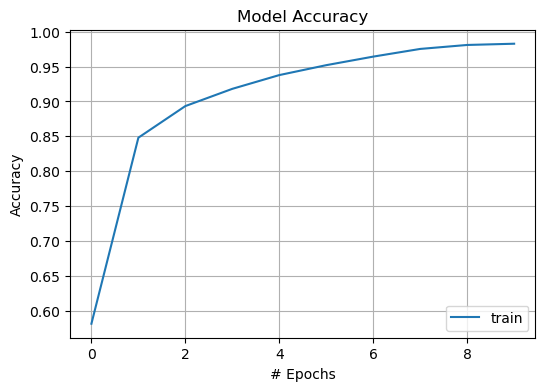

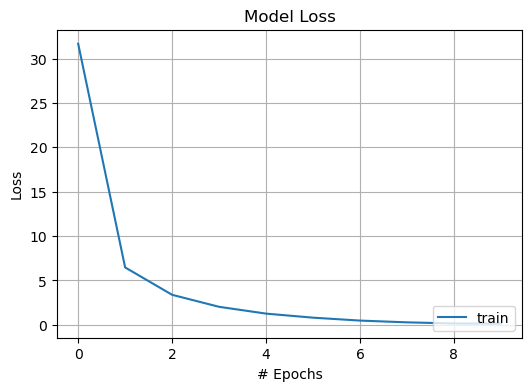

In [27]:
epoch = len(training_history.history.get('loss',[]))

# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('accuracy'))
#plt.plot(range(epoch),training_history.history.get('val_acc'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
# plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('loss'))
#plt.plot(range(epoch),training_history.history.get('val_loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
# plt.style.use(['classic'])